<a href="https://colab.research.google.com/github/maulik987/maulik/blob/main/collage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

In [10]:
# Step 1: Sample feedback data
data = {
    "feedback": [
        "The professor explains concepts clearly.",
        "The classroom AC is broken again.",
        "Admin office delay is frustrating.",
        "Wi-Fi in hostel is not working.",
        "Assignments are not discussed properly.",
        "Cleanliness in the washroom is poor.",
        "Faculty is very supportive and helpful.",
        "No response from administration department.",
    ]
}

In [11]:


df = pd.DataFrame(data)

# Step 2: Define classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Step 3: Define candidate labels
labels = ["Academics", "Facilities", "Administration"]

# Step 4: Define the missing function
def classify_feedback(text):
    result = classifier(text, candidate_labels=labels)
    return result["labels"][0]  # return top predicted label

# Step 5: Apply classification
df['category'] = df['feedback'].apply(classify_feedback)


Device set to use cpu


In [12]:

# Step 6: Save and print
df.to_csv("classified_feedback.csv", index=False)
print(df)



                                      feedback        category
0     The professor explains concepts clearly.       Academics
1            The classroom AC is broken again.       Academics
2           Admin office delay is frustrating.  Administration
3              Wi-Fi in hostel is not working.      Facilities
4      Assignments are not discussed properly.  Administration
5         Cleanliness in the washroom is poor.      Facilities
6      Faculty is very supportive and helpful.      Facilities
7  No response from administration department.  Administration


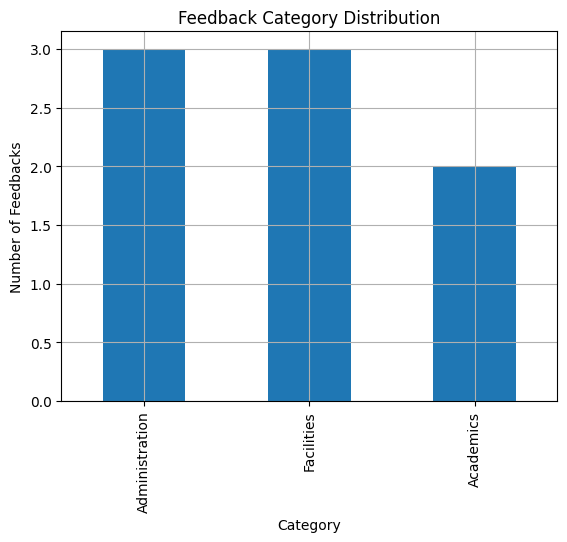

In [8]:
df['category'].value_counts().plot(kind='bar', title='Feedback Category Distribution')
plt.xlabel("Category")
plt.ylabel("Number of Feedbacks")
plt.grid(True)
plt.show()
